In [209]:
from scipy import stats
from math import sqrt
import numpy as np
import matplotlib.pyplot as pltfrom scipy import stats
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

# Test férovosti mince

Házíme $n$-krát korunou, chceme poznat, jestli mají obě strany stejnou pravděpodobnost.
Provedeme test na hladině významnosti $\alpha = 0.05$ -- tj. chceme volat na poplach 
jen s pravděpodobností $< \alpha$ (pokud je mince spravedlivá).

Nulová hypotéza je $H_0: p = 1/2$. 

Alternativní hypotéza je $H_1: p \ne 1/2$ (oboustranný test)

nebo $H_2: p < 1/2$, případně $H_3: p > 1/2$ (jednostranné testy). 


Testová statistika je $T \sim Bin(n,0.5)$.

In [210]:
n = 100
alpha = 0.05
k = np.arange(n+1)
T = stats.binom(n,.5)

Chceme najít oblast jako na obrázku níže, aby součet modrých teček byl těsně pod $\alpha$. 

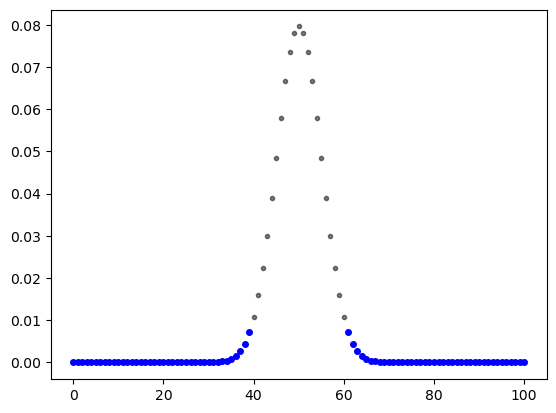

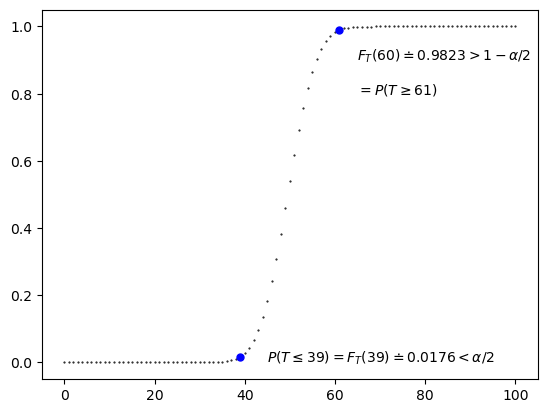

In [225]:
R1 = np.arange(40); R1
R2 = n - R1; R2
R = np.concatenate([R1,R2[::-1]])

plt.plot(k,T.pmf(k), "k.", alpha = 0.5)
plt.plot(R,T.pmf(R), "b.", ms=8)
plt.savefig("TH-1-pmf.png")
plt.show()

plt.plot(k,T.cdf(k), "k.", ms=1)
x = np.array([39,61])
plt.plot(x,T.cdf(x), "b.", ms=10)
plt.text(45,0, "$P(T \\leq 39) = F_T(39) \\doteq 0.0176 < \\alpha/2$")
plt.text(65,0.9, "$F_T(60) \\doteq 0.9823 > 1 - \\alpha/2$")
plt.text(65,0.8, "$= P(T \\geq 61)$")
plt.savefig("TH-2-cdf.png")
plt.show()

Jak spočteme hranice těch oblastí? Pomocí kvantilové funkce, ve ``scipy`` funkce ``.ppf()``. 
Pro kontrolu $\pm 1$ chyb si vypíšeme krajní hodnoty.

In [29]:
T.ppf(alpha/2), T.ppf(1-alpha/2)

(40.0, 60.0)

Pro zkrácení můžeme používat ``.sf() = 1 - .cdf()``.

In [218]:
T.cdf(60)

0.9823998998911476

In [127]:
T.cdf(39), T.cdf(40), 1-T.cdf(59), 1-T.cdf(60), T.sf(59), T.sf(60)

(0.017600100108852396,
 0.028443966820490392,
 0.02844396682049044,
 0.01760010010885238,
 0.028443966820490392,
 0.017600100108852396)

In [146]:
print(R)
T.pmf(R).sum()

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100]


0.035200200217704786

Takže součet modrých teček níže -- pravděpodobnost chyby prvního druhu -- je zhruba 3.5 %. 

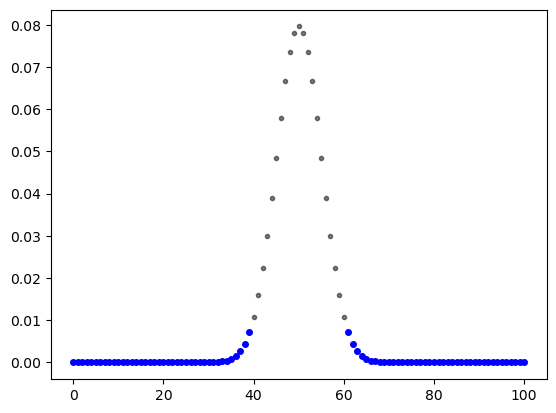

In [206]:
plt.plot(k,T.pmf(k), "k.", alpha=0.5)
plt.plot(R,T.pmf(R), "b.", ms=8)
plt.show()

## Jednostranný odhad

Co když chceme detekovat jenom nízkou pravděpodobnost úspěchu? 

In [47]:
T.ppf(alpha)

42.0

In [77]:
RR = np.arange(42); RR

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41])

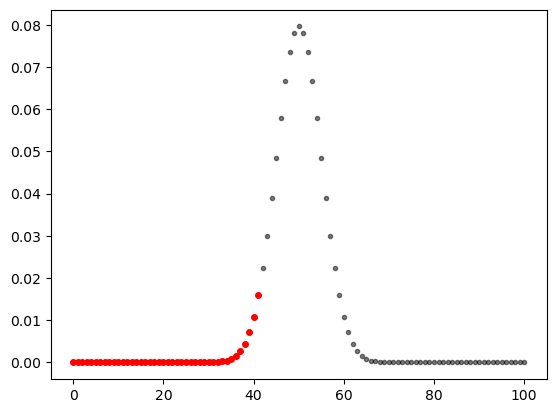

In [208]:
plt.plot(k,T.pmf(k), "k.", alpha=0.5)
plt.plot(RR,T.pmf(RR), "r.", ms=8)
plt.savefig("TH-3-pmf-onesided.png")
plt.show()

# Spočítáme sílu testu

Bude se lišit podle skutečné hodnoty $p$.

In [79]:
RR

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41])

In [83]:
stats.binom.cdf(41,n,0.4), stats.binom.pmf(RR, n, 0.4).sum()

(0.6225326761221707, 0.6225326761221721)

In [88]:
stats.binom.cdf(39,n,0.4)+stats.binom.sf(n-39-1,n,0.4), stats.binom.pmf(R, n, 0.4).sum()

(0.46209338234839553, 0.4620933823483936)

In [114]:
p = np.arange(0,1,.01)

In [120]:
stats.binom.cdf(41, n, 0.5)

0.044313040057033834

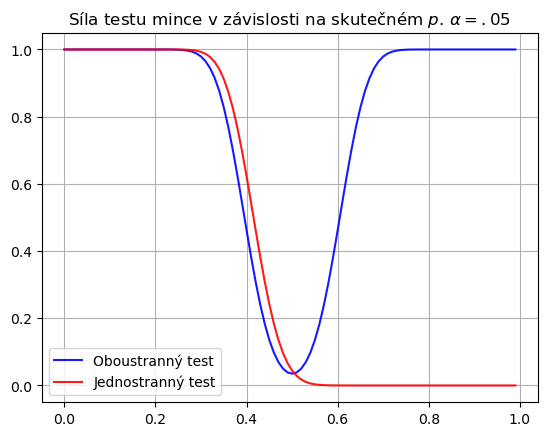

In [229]:
plt.plot(p, stats.binom.cdf(39,n,p)+stats.binom.sf(n-39-1,n,p), 'b-', alpha=0.9)
plt.plot(p, stats.binom.cdf(41, n, p), 'r-', alpha=0.9)
plt.grid(True)
plt.legend(['Oboustranný test', 'Jednostranný test'])
plt.title("Síla testu mince v závislosti na skutečném $p$. $\\alpha=.05$")
plt.savefig("TH-4-power1.png")
plt.show()

# Co když nám vadí nízká síla testu? 

## Zvýšení $\alpha$

In [231]:
alpha = 0.1
k = np.arange(n+1)
T = stats.binom(n,.5)
a = T.ppf(alpha/2)
b = T.ppf(alpha)

In [232]:
a, b

(42.0, 44.0)

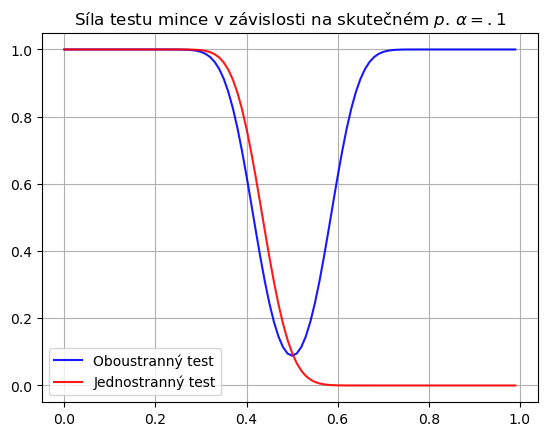

In [233]:
plt.plot(p, stats.binom.cdf(a-1,n,p)+stats.binom.sf(n-a,n,p), 'b-', alpha=0.9)
plt.plot(p, stats.binom.cdf(b-1, n, p), 'r-', alpha=0.9)
plt.grid(True)
plt.legend(['Oboustranný test', 'Jednostranný test'])
plt.title("Síla testu mince v závislosti na skutečném $p$. $\\alpha=.1$")
plt.savefig("TH-5-power2.png")
plt.show()

## Zvýšení $n$ je lepší, pokud to jde!

In [235]:
n = 1000
alpha = 0.05
k = np.arange(n+1)
T = stats.binom(n,.5)
a = T.ppf(alpha/2)
b = T.ppf(alpha)

In [236]:
a, b

(469.0, 474.0)

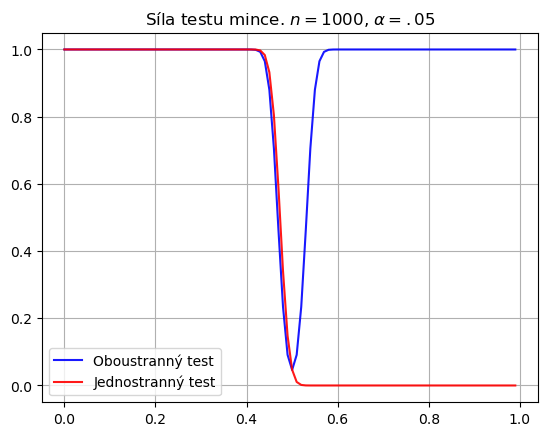

In [238]:
plt.plot(p, stats.binom.cdf(a-1,n,p)+stats.binom.sf(n-a,n,p), 'b-', alpha=0.9)
plt.plot(p, stats.binom.cdf(b-1, n, p), 'r-', alpha=0.9)
plt.grid(True)
plt.legend(['Oboustranný test', 'Jednostranný test'])
plt.title("Síla testu mince. $n = 1000$, $\\alpha=.05$")
plt.savefig("TH-6-power3.png")
plt.show()

# A konečně, co když nechceme vše dělat na koleně? 

In [202]:
stats.binomtest(k=35, n=100, p=0.5, alternative='two-sided')

BinomTestResult(k=35, n=100, alternative='two-sided', statistic=0.35, pvalue=0.0035176417229701587)

In [201]:
stats.binomtest(k=40, n=100, p=0.5, alternative='two-sided')

BinomTestResult(k=40, n=100, alternative='two-sided', statistic=0.4, pvalue=0.056887933640980784)

In [200]:
stats.binomtest(k=43, n=100, p=0.5, alternative='two-sided')

BinomTestResult(k=43, n=100, alternative='two-sided', statistic=0.43, pvalue=0.1933479044956428)

In [182]:
stats.binomtest(k=468, n=1000, p=0.5, alternative='two-sided')

BinomTestResult(k=468, n=1000, alternative='two-sided', statistic=0.468, pvalue=0.04629119736049808)

In [181]:
stats.binomtest(k=469, n=1000, p=0.5, alternative='two-sided')

BinomTestResult(k=469, n=1000, alternative='two-sided', statistic=0.469, pvalue=0.053677849645009976)

In [183]:
stats.binomtest(k=469, n=1000, p=0.5, alternative='less')

BinomTestResult(k=469, n=1000, alternative='less', statistic=0.469, pvalue=0.026838924822504988)

In [425]:
stats.binomtest(k=472, n=1000, p=0.5, alternative='two-sided')

BinomTestResult(k=472, n=1000, alternative='two-sided', statistic=0.472, pvalue=0.08193870178881396)

In [426]:
stats.binomtest(k=472, n=1000, p=0.5, alternative='less')

BinomTestResult(k=472, n=1000, alternative='less', statistic=0.472, pvalue=0.04096935089440698)

# chi^2 a G-test

Hodíme 600-krát hrací kostkou, jednotlivá čísla padnou 92, 120, 88, 98, 95, a 107-krát. 
Je kostka spravedlivá? 

$H_0$ každé číslo má v každém hodu pravděpodobnost $1/6$

$H_1$ jiné rozložení

In [428]:
obs = np.array([92, 120, 88, 98, 95, 107])

* chi-kvadrát test pomocí knihovny. Vyjde p-value $> 0.05$, proto $H_0$ nezamítáme

In [266]:
stats.chisquare(obs)

Power_divergenceResult(statistic=6.86, pvalue=0.23126224576166762)

* O něco lepší je G-test, který nemá hezky pojmenovanou funkci, ale lze spočítat pomocí obecnější metody takto: 

In [272]:
stats.power_divergence(obs, lambda_='log-likelihood')

Power_divergenceResult(statistic=6.689778405551933, pvalue=0.24475286293843238)

* Pro kontrolu spočteme přímo. Buď přímo prostředky Pythonu: 

In [264]:
sum(obs)

600

In [268]:
sum([ (x-100)**2/100 for x in obs])

6.86

* Nebo stručněji pomocí ``numpy``

In [269]:
sum((obs-100)**2/100)

6.86

* Distribuční funkce rozdělení $\chi^2$ s 5 stupni volnosti nám pomůže zjistit p-hodnotu.
Musíme jen odečíst od 1, jde nám o pravděpodobnost, že $\chi^2 > 6.86$.

In [254]:
1-stats.chi2.cdf(6.86, df=5)

0.23126224576166765

* Hraniční hodnota:

In [256]:
stats.chi2.ppf(0.95, df=5)

11.070497693516351

* Můžeme také spočíst statistiku $G$ přímo -- ale neni tak snadné odsud určit p-hodnotu.

In [270]:
sum(2*obs*np.log(obs/100))

6.689778405551933

## Histogram $\chi_5^2 = \sum_{i=1}^6 \frac{(O_i-E_i)^2}{E_i}$

Zkusíme $10^4$-krát použít tuto statistiku pro 600 hodů kostkou. A srovnat s ideální hustotou:

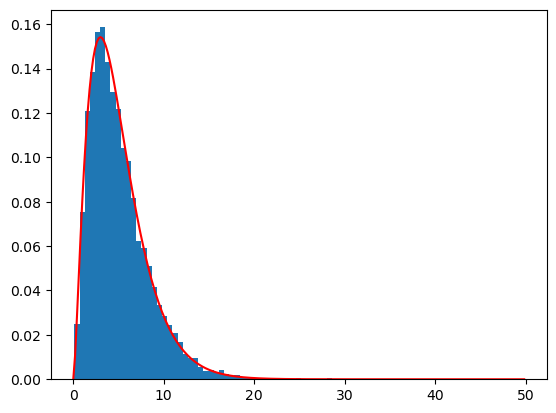

In [400]:
n = 600
X = stats.multinomial(n, [1/6]*6).rvs(size=10_000)
chisq = ((X-n/6)**2/(n/6)).sum(axis=1)
plt.hist(chisq, bins=50, density=True)
plt.plot(q:=np.arange(0,50,.2),stats.chi2.pdf(q, df=5),'r-');

Jedná se ale jen o aproximaci. Vidíme, že $n=60$ hodů kostkou je příliš malé číslo, aby měla $\chi^2$ statistika skutečně $\chi^2$ rozdělení s 5 stupni volnosti.

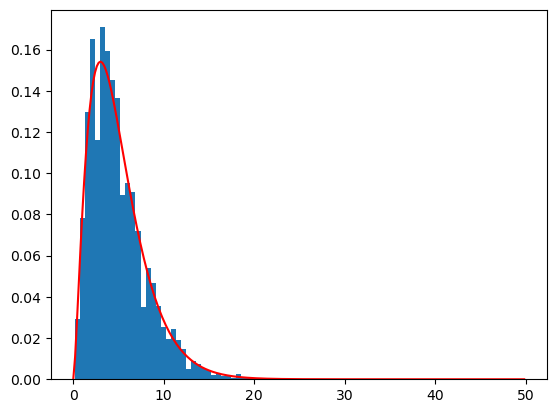

In [404]:
n = 60
X = stats.multinomial(n, [1/6]*6).rvs(size=10_000)
chisq = ((X-n/6)**2/(n/6)).sum(axis=1)
plt.hist(chisq, bins=50, density=True)
plt.plot(q:=np.arange(0,50,.2),stats.chi2.pdf(q, df=5),'r-');

Pokud provedeme jen $n=6$ hodů kostkou tak si můžeme ujasnit, že možných výsledků je jen konečně mnoho (a poměrné málo), 
proto naše statistika (ať už bude jakákoli) má diskrétní rozdělení: 

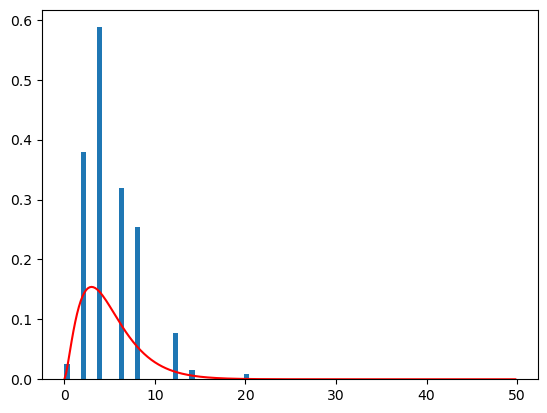

In [405]:
n = 6
X = stats.multinomial(n, [1/6]*6).rvs(size=10_000)
chisq = ((X-n/6)**2/(n/6)).sum(axis=1)
plt.hist(chisq, bins=50, density=True)
plt.plot(q:=np.arange(0,50,.2),stats.chi2.pdf(q, df=5),'r-');

## Součet pěti druhých mocnin normálního rozdělení

Ta červená křivka (nahoře i zde) je ``stats.chi2.pdf``, neboli hustota $\chi^2$-rozdělní s 5 stupni volnosti, neboli 
hustota součtu pěti nezávislých stand. normálních veličin. 

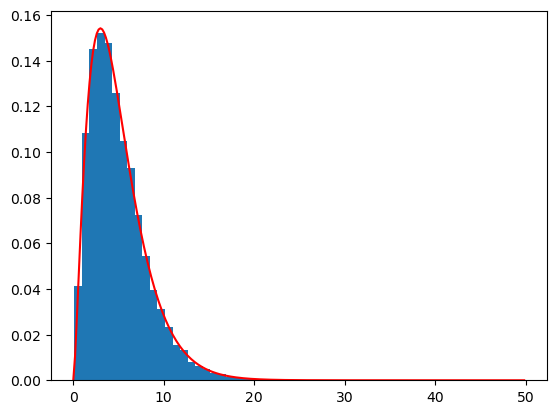

In [394]:
Z = stats.norm.rvs(size=(10_000,5))
plt.hist((Z**2).sum(axis=1), bins=30, density=True)
plt.plot(q:=np.arange(0,50,.2), stats.chi2.pdf(q, df=5),'r-');

# Hustota $\chi^2$ s $k$ stupni volnosti

Pro úplnost si ukažme tuto hustotu s jinými počty volnosti. 
Pro $k=1$ má rozdělení v nule nekonečnou hustotu! 
To je ale případ, který nebudeme pro $\chi^2$-test potřebovat -- pokud máme jen dva výstupy, 
tak stačí počítat jeden z nich. Neboli místo multinomiálního rozdělení s dvěma kategoriemi stačí 
zkoumat binomické rozdělení -- počet pokusů s prvním výsledkem (kdy padla jednička). A dostaneme 
zpátky příklad, se kterým jsme nahoře začali. 

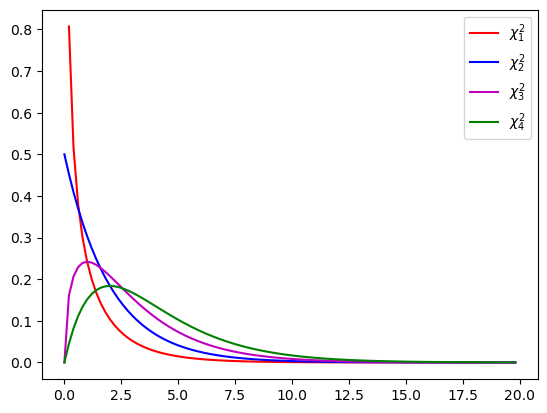

In [415]:
q=np.arange(0,20,.2)
plt.plot(q,stats.chi2.pdf(q, df=1),'r-')
plt.plot(q,stats.chi2.pdf(q, df=2),'b-')
plt.plot(q,stats.chi2.pdf(q, df=3),'m-')
plt.plot(q,stats.chi2.pdf(q, df=4),'g-')
plt.legend([f"$\\chi^2_{k}$" for k in [1,2,3,4]]);